In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')

In [3]:
df = deliveries.copy()

In [4]:
def is_bowler_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in ['run out', 'retired hurt', 'obstructing the field']:
             return 1
        else:
            return 0
    else:
        return 0

In [5]:
df['isBowlerWk'] = df.apply(lambda x: is_bowler_wicket(x['player_dismissed'], x['dismissal_kind']), axis = 1)

In [6]:
df['total_runs'] = df['batsman_runs'] + df['extras']

In [7]:
# Runs_Conceded, Wickets, Innings, Bowl_Avg, Bowl_SR, BPW, RPW, Dot%, Economy

In [8]:
def BowlerStats(df,current_innings): 
    
    #This function is used to differentiate performance based on innings wise
    
    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['total_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['total_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['total_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns = {'total_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['bowler'])['matchId'].count()).reset_index().rename(columns = {'matchId' : 'Balls'})
    innings = pd.DataFrame(df.groupby(['bowler'])['matchId'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'matchId' : 'Innings'})
    dismissals = pd.DataFrame(df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns = {'isBowlerWk' : 'Dismissals'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour' : 'Fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix' : 'Sixes'})
    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot' : 'Dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne' : 'Ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo' : 'Twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree' : 'Threes'})
    
    df = pd.merge(innings,runs, on ='bowler').merge(balls,on='bowler').merge(dismissals,on='bowler').merge(fours,on='bowler').merge(sixes,on='bowler').merge(dots,on='bowler').merge(ones,on='bowler').merge(twos,on='bowler').merge(threes,on='bowler')
    
    df['Dot%'] = df.apply(lambda x : 100*(x['Dots']/x['Balls']), axis = 1)
    
    return df

In [9]:
df1 = BowlerStats(df,1)

In [10]:
df2 = BowlerStats(df,2)

In [11]:
df1.head()

,bowler,Innings,Runs,Balls,Dismissals,Fours,Sixes,Dots,Ones,Twos,Threes,Dot%
0,A Ashish Reddy,8,148,98,7,10,7,26,45,9,1,26.530612
1,A Badoni,1,6,6,1,0,0,2,2,2,0,33.333333
2,A Chandila,6,142,120,3,15,4,51,43,6,1,42.500000
3,A Choudhary,2,72,52,3,6,3,18,20,5,0,34.615385
4,A Flintoff,2,95,48,1,6,7,10,21,4,0,20.833333


In [12]:
df2.head()

,bowler,Innings,Runs,Balls,Dismissals,Fours,Sixes,Dots,Ones,Twos,Threes,Dot%
0,A Ashish Reddy,12,252,172,11,16,13,53,72,16,2,30.813953
1,A Badoni,1,6,6,1,0,0,1,4,1,0,16.666667
2,A Chandila,6,103,114,8,2,6,52,49,5,0,45.614035
3,A Choudhary,3,72,56,2,7,3,24,18,4,0,42.857143
4,A Dananjaya,1,47,25,0,2,4,6,11,2,0,24.000000


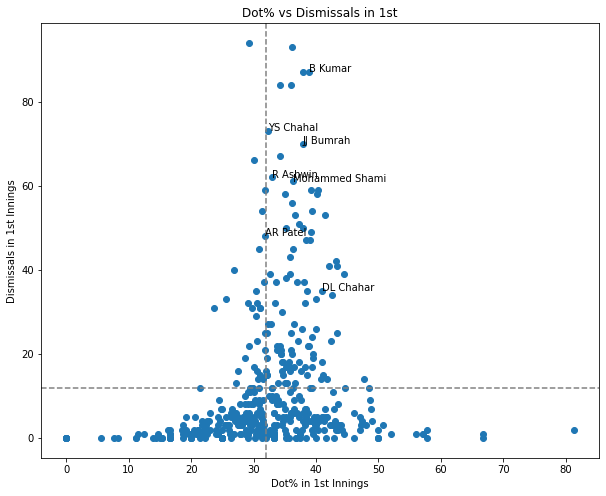

In [13]:
plt.figure(figsize = (10,8))

plt.scatter(df1['Dot%'], df1['Dismissals'])
plt.xlabel('Dot% in 1st Innings')
plt.ylabel('Dismissals in 1st Innings')
plt.title('Dot% vs Dismissals in 1st')
plt.axvline(32, ls = '--', color = 'grey')
plt.axhline(12, ls = '--', color = 'grey')

annotations=list(df1['bowler'])
selected_bowlers = ['JJ Bumrah', 'YS Chahal', 'B Kumar', 'DL Chahar', 'Mohammed Shami','AR Patel','R Ashwin']

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        plt.annotate(j, (df1['Dot%'][i], df1['Dismissals'][i]))

plt.show()

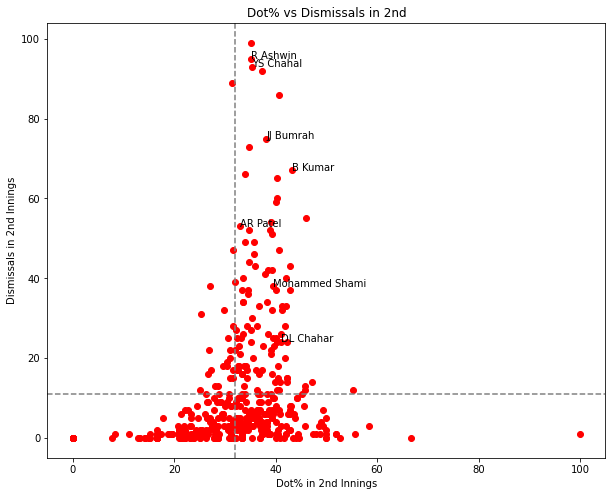

In [14]:
plt.figure(figsize = (10,8))

plt.scatter(df2['Dot%'], df2['Dismissals'], color = 'red')
plt.xlabel('Dot% in 2nd Innings')
plt.ylabel('Dismissals in 2nd Innings')
plt.title('Dot% vs Dismissals in 2nd')
plt.axvline(32, ls = '--', color = 'grey')
plt.axhline(11, ls = '--', color = 'grey')

annotations=list(df2['bowler'])
selected_bowlers = ['JJ Bumrah', 'YS Chahal', 'B Kumar', 'DL Chahar', 'Mohammed Shami','AR Patel','R Ashwin']

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        plt.annotate(j, (df2['Dot%'][i], df2['Dismissals'][i]))

plt.show()

In [15]:
df1['Dot%'].mean(), df1['Dismissals'].mean()

(32.312643572481484, 12.142523364485982)

In [16]:
df2['Dot%'].mean(), df2['Dismissals'].mean()

(32.157101172695384, 11.423255813953489)

In [17]:
def Player(selected_player): 
    
    #This function is used to determine the performance of a particular player against all oppositions that he has played with
    
    total_wickets = df[df.bowler == selected_player].groupby(['bowler'])['isBowlerWk'].sum().item()
    
    plt.figure(figsize = (12,8))
    
    df[df.bowler == selected_player].groupby(['batting_team'])['isBowlerWk'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'g')
    plt.xlabel('Wickets')
    plt.ylabel('Opposition')
    plt.title(selected_player + " - against all oppostions" + "(Wkts :" + str(total_wickets) + ")")
    
    plt.show()

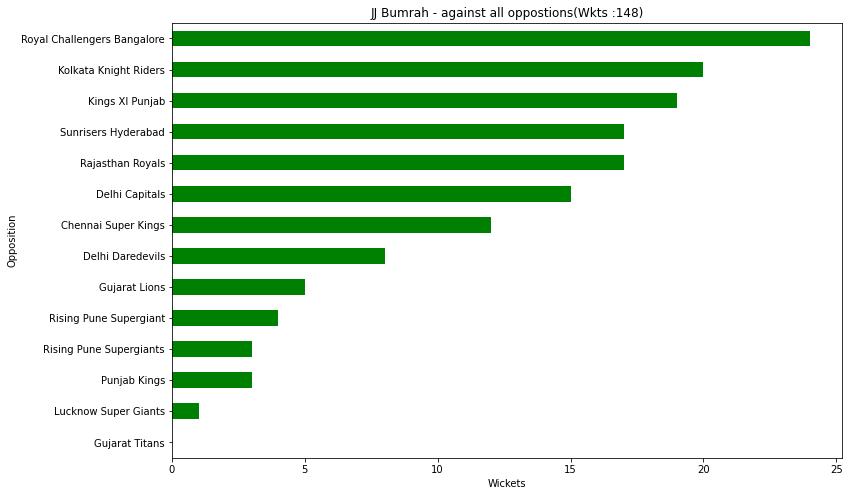

In [18]:
Player('JJ Bumrah')

In [19]:
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [20]:
mdf = matches.copy()

In [21]:
mdf.head()

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,Kolkata Knight Riders,NaN,6,CA Lynn,NaN,NaN,Saurashtra Cricket Association Stadium,NaN,field,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,Rising Pune Supergiant,NaN,6,GJ Maxwell,NaN,NaN,Holkar Cricket Stadium,NaN,field,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,Delhi Daredevils,15.0,6,KM Jadhav,NaN,NaN,M.Chinnaswamy Stadium,NaN,bat,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595


In [22]:
def wintoss_winmatch(toss_winner, winner):
    if toss_winner == winner:
        return 1
    else:
        return 0

In [23]:
mdf['WinToss_WinMatch'] = mdf.apply(lambda x: wintoss_winmatch(x['toss_winner'], x['winner']), axis = 1)

In [24]:
mdf[['toss_winner', 'winner', 'WinToss_WinMatch']].head()

,toss_winner,winner,WinToss_WinMatch
0,Royal Challengers Bangalore,Sunrisers Hyderabad,0
1,Rising Pune Supergiant,Rising Pune Supergiant,1
2,Kolkata Knight Riders,Kolkata Knight Riders,1
3,Kings XI Punjab,Kings XI Punjab,1
4,Royal Challengers Bangalore,Royal Challengers Bangalore,1


In [25]:
len(mdf)

950

In [26]:
100* len(mdf[mdf.WinToss_WinMatch == 1])/len(mdf) , 100* len(mdf[mdf.WinToss_WinMatch == 0])/len(mdf)

(50.8421052631579, 49.1578947368421)

In [27]:
pd.DataFrame(100* (mdf.groupby('season')['WinToss_WinMatch'].sum()/mdf.groupby('season')['WinToss_WinMatch'].count()))

,WinToss_WinMatch
season,
2007/08,48.275862
2009,57.894737
2009/10,51.666667
2011,52.054795
2012,44.594595
2013,46.052632
2014,48.333333
2015,45.762712
2016,56.666667


In [28]:
cdf = df.merge(mdf, on ='matchId', how = 'left')

In [29]:
cdf.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerWk,total_runs,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,WinToss_WinMatch
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0


In [30]:
vdf_runs = cdf.groupby('venue')['total_runs'].sum()/cdf.groupby('venue')['matchId'].apply(lambda x :(len(list(np.unique(x)))))

In [31]:
vdf_RPW = vdf_runs = cdf.groupby('venue')['total_runs'].sum()/cdf.groupby('venue')['player_dismissed'].count()

## First of all, convert the dismissals in terms of bowlers wicket and then start the analysis. Define a function to analyse the bowler's performance based on innings and get the parameters to be analysed on. Use a selected_player variable to visualize the player's performance against the oppositions he has played with. 

## Define a function to determine whether the team winning the toss goes on to win the match. Return 1 if yes and 0 if not. Calculate the percentage based on the matches played at a venue or based on seasons.